<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.006746,43.435685,83.085977,62.947352,-82.302808,200.172951,287.877987,-87.705036
1,0.0,1.0,45.784053,67.326978,20.186993,40.340986,69.703443,253.342453,178.471794,74.870659
2,0.0,2.0,20.916669,31.710843,50.614926,54.583023,0.211160,168.036621,165.961249,2.075372
3,0.0,3.0,55.299173,84.164426,58.908541,42.993623,132.511187,383.876950,254.310496,129.566454
4,0.0,4.0,27.377167,44.899797,65.393031,76.922670,30.864855,255.457521,231.189136,24.268384
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,99.549392,33.171625,70.011404,28.104786,24.679112,265.516319,250.649919,14.866400
249996,999.0,246.0,22.991088,23.944247,26.292994,85.690531,-6.050392,162.868467,159.348157,3.520310
249997,999.0,247.0,96.418876,21.754252,95.617601,74.774306,13.176145,311.741180,287.385229,24.355951
249998,999.0,248.0,78.411527,73.008576,79.153101,24.446702,17.562992,282.582897,282.220440,0.362458


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    83.006746  43.435685  83.085977  62.947352  -82.302808   
      1.0    45.784053  67.326978  20.186993  40.340986   69.703443   
      2.0    20.916669  31.710843  50.614926  54.583023    0.211160   
      3.0    55.299173  84.164426  58.908541  42.993623  132.511187   
      4.0    27.377167  44.899797  65.393031  76.922670   30.864855   
...                ...        ...        ...        ...         ...   
999.0 245.0  99.549392  33.171625  70.011404  28.104786   24.679112   
      246.0  22.991088  23.944247  26.292994  85.690531   -6.050392   
      247.0  96.418876  21.754252  95.617601  74.774306   13.176145   
      248.0  78.411527  73.008576  79.153101  24.446702   17.562992   
      249.0  88.890254  61.021528  81.212654  99.442467   -9.493960   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    200.172951  287.877987  -87.705036  
      1.0    253.342453  178.471794   74.870659  
      2.0    168.036621  165.961249    2.075372  
      3.0    383.876950  254.310496  129.566454  
      4.0    255.457521  231.189136   24.268384  
...                 ...         ...         ...  
999.0 245.0  265.516319  250.649919   14.866400  
      246.0  162.868467  159.348157    3.520310  
      247.0  311.741180  287.385229   24.355951  
      248.0  282.582897  282.220440    0.362458  
      249.0  331.072944  328.361368    2.711576  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    83.006746  43.435685  83.085977  62.947352  -82.302808   
      1.0    45.784053  67.326978  20.186993  40.340986   69.703443   
      2.0    20.916669  31.710843  50.614926  54.583023    0.211160   
      3.0    55.299173  84.164426  58.908541  42.993623  132.511187   
      4.0    27.377167  44.899797  65.393031  76.922670   30.864855   
...                ...        ...        ...        ...         ...   
999.0 245.0  99.549392  33.171625  70.011404  28.104786   24.679112   
      246.0  22.991088  23.944247  26.292994  85.690531   -6.050392   
      247.0  96.418876  21.754252  95.617601  74.774306   13.176145   
      248.0  78.411527  73.008576  79.153101  24.446702   17.562992   
      249.0  88.890254  61.021528  81.212654  99.442467   -9.493960   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    200.172951  287.877987  -87.705036  
      1.0    253.342453  178.471794   74.870659  
      2.0    168.036621  165.961249    2.075372  
      3.0    383.876950  254.310496  129.566454  
      4.0    255.457521  231.189136   24.268384  
...                 ...         ...         ...  
999.0 245.0  265.516319  250.649919   14.866400  
      246.0  162.868467  159.348157    3.520310  
      247.0  311.741180  287.385229   24.355951  
      248.0  282.582897  282.220440    0.362458  
      249.0  331.072944  328.361368    2.711576  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.006746,43.435685,83.085977,62.947352,-82.302808,200.172951,287.877987,-87.705036
1,0.0,1.0,45.784053,67.326978,20.186993,40.340986,69.703443,253.342453,178.471794,74.870659
2,0.0,2.0,20.916669,31.710843,50.614926,54.583023,0.211160,168.036621,165.961249,2.075372
3,0.0,3.0,55.299173,84.164426,58.908541,42.993623,132.511187,383.876950,254.310496,129.566454
4,0.0,4.0,27.377167,44.899797,65.393031,76.922670,30.864855,255.457521,231.189136,24.268384
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,99.549392,33.171625,70.011404,28.104786,24.679112,265.516319,250.649919,14.866400
249996,999.0,246.0,22.991088,23.944247,26.292994,85.690531,-6.050392,162.868467,159.348157,3.520310
249997,999.0,247.0,96.418876,21.754252,95.617601,74.774306,13.176145,311.741180,287.385229,24.355951
249998,999.0,248.0,78.411527,73.008576,79.153101,24.446702,17.562992,282.582897,282.220440,0.362458


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    83.006746  43.435685  83.085977  62.947352  -82.302808   
      1.0    45.784053  67.326978  20.186993  40.340986   69.703443   
      2.0    20.916669  31.710843  50.614926  54.583023    0.211160   
      3.0    55.299173  84.164426  58.908541  42.993623  132.511187   
      4.0    27.377167  44.899797  65.393031  76.922670   30.864855   
...                ...        ...        ...        ...         ...   
999.0 245.0  99.549392  33.171625  70.011404  28.104786   24.679112   
      246.0  22.991088  23.944247  26.292994  85.690531   -6.050392   
      247.0  96.418876  21.754252  95.617601  74.774306   13.176145   
      248.0  78.411527  73.008576  79.153101  24.446702   17.562992   
      249.0  88.890254  61.021528  81.212654  99.442467   -9.493960   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    200.172951  287.877987  -87.705036  
      1.0    253.342453  178.471794   74.870659  
      2.0    168.036621  165.961249    2.075372  
      3.0    383.876950  254.310496  129.566454  
      4.0    255.457521  231.189136   24.268384  
...                 ...         ...         ...  
999.0 245.0  265.516319  250.649919   14.866400  
      246.0  162.868467  159.348157    3.520310  
      247.0  311.741180  287.385229   24.355951  
      248.0  282.582897  282.220440    0.362458  
      249.0  331.072944  328.361368    2.711576  

[250000 rows x 8 columns]

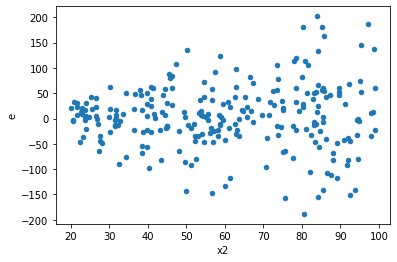

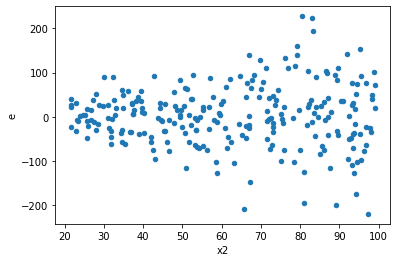

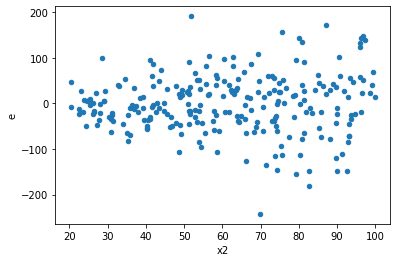

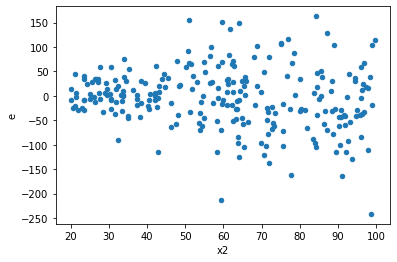

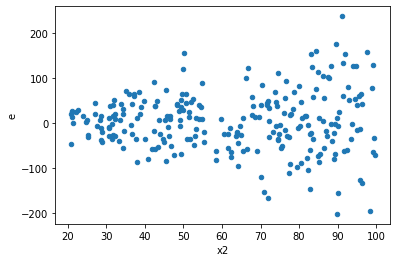

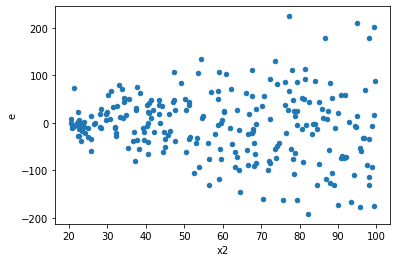

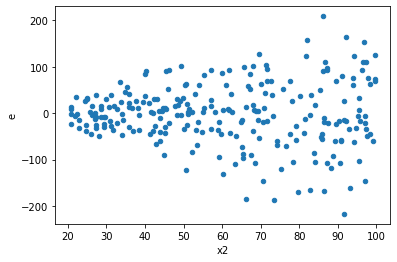

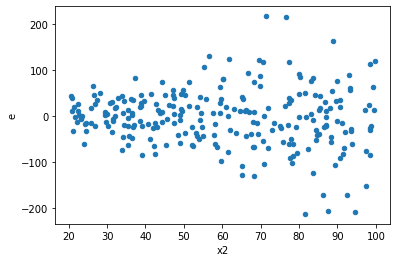

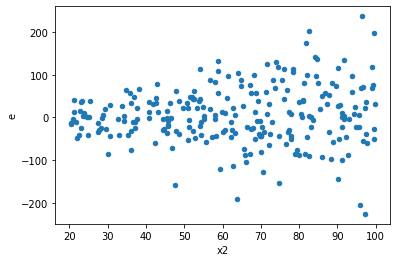

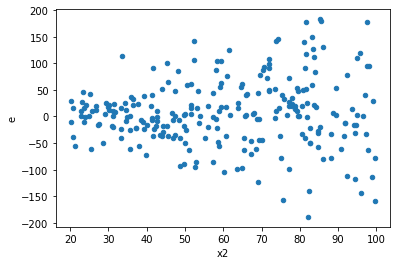

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,128.0,114.0,532473.1153005266,636693.5239545036,4159.946213285364,5585.03091188161,1.3425728664579943,0.10888298778817984,0.9455585061059101,0.05444149389408992,Reject005=1 : Homoscedasticity
2.0,129.0,113.0,410730.7845781882,545162.2453561709,3183.959570373552,4824.444649169654,1.5152342680669262,0.024220615256241862,0.9878896923718791,0.012110307628120931,Reject005=0 : Heteroscedasticity
6.0,120.0,122.0,392608.1646943727,708310.6655421292,3271.734705786439,5805.825127394502,1.7745403125523083,0.0017501612186872073,0.9991249193906564,0.0008750806093436037,Reject005=0 : Heteroscedasticity
7.0,136.0,106.0,347729.1795335565,580716.3085565106,2556.8322024526215,5478.4557410991565,2.1426731624562576,5.498244773693983e-05,0.9999725087761315,2.7491223868469916e-05,Reject005=0 : Heteroscedasticity
10.0,106.0,136.0,380476.7468044218,589852.9744477279,3589.4032717398286,4337.154223880352,1.2083218004585146,0.2976613825507821,0.8511693087246089,0.14883069127539106,Reject005=1 : Homoscedasticity
12.0,122.0,120.0,399363.3615956468,472164.9116786918,3273.4701770134984,3934.707597322432,1.2019989138597265,0.3132942434073711,0.8433528782963144,0.15664712170368555,Reject005=1 : Homoscedasticity
14.0,124.0,118.0,312960.6003265901,626455.9425563139,2523.8758090854044,5308.948665731474,2.10349045171732,5.791592701687165e-05,0.9999710420364916,2.8957963508435824e-05,Reject005=0 : Heteroscedasticity
15.0,122.0,120.0,224625.06321141086,704897.2682877913,1841.1890427164824,5874.143902398261,3.190407810450346,5.943503467165101e-10,0.9999999997028248,2.9717517335825505e-10,Reject005=0 : Heteroscedasticity
19.0,132.0,110.0,505716.9023654939,533765.6444125207,3831.1886542840443,4852.414949204734,1.2665559926887837,0.20054893237664762,0.8997255338116762,0.10027446618832381,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,121.0,121.0,563474.5735598999,374283.79129926034,4656.814657519834,3093.2544735476063,0.6642425565622656,0.025240055776191976,Reject005=0 : Heteroscedasticity
1.0,128.0,114.0,532473.1153005266,636693.5239545036,4159.946213285364,5585.03091188161,1.3425728664579943,0.10888298778817984,Reject005=1 : Homoscedasticity
2.0,129.0,113.0,410730.7845781882,545162.2453561709,3183.959570373552,4824.444649169654,1.5152342680669262,0.024220615256241862,Reject005=0 : Heteroscedasticity
3.0,130.0,112.0,543278.0506259687,371277.4552262745,4179.061927892067,3314.9772788060222,0.7932347823517677,0.20245194702034616,Reject005=1 : Homoscedasticity
4.0,130.0,112.0,599587.5425101492,453210.37404183566,4612.211865462686,4046.521196802104,0.8773493748419051,0.47052180528800325,Reject005=1 : Homoscedasticity
5.0,125.0,117.0,901083.6183331776,234822.36787117049,7208.668946665422,2007.0287852236793,0.2784187760698996,7.824313905947265e-12,Reject005=0 : Heteroscedasticity
6.0,120.0,122.0,392608.1646943727,708310.6655421292,3271.734705786439,5805.825127394502,1.7745403125523083,0.0017501612186872073,Reject005=0 : Heteroscedasticity
7.0,136.0,106.0,347729.1795335565,580716.3085565106,2556.8322024526215,5478.4557410991565,2.1426731624562576,5.498244773693983e-05,Reject005=0 : Heteroscedasticity
8.0,120.0,122.0,595071.6928905251,499318.0244869765,4958.930774087709,4092.770692516201,0.8253332984405585,0.29278846697848765,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      550
Reject005=0 : Heteroscedasticity    450
Name: Result_test, dtype: int64